<font size="3"> 

<b>Name: Bai Lan
<br>
<br>
August 2021
<br>
<br>
Title: Predictive Modelling with Time Series<b> 

</font>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/bailan/data_1995_new.csv')

In [3]:
data.head()

,Date,SP500
0,1995-01,465.25
1,1995-02,481.92
2,1995-03,493.15
3,1995-04,507.91
4,1995-05,523.81


In [4]:
data.tail(7)

,Date,SP500
101,2003-06,988.00
102,2003-07,992.54
103,2003-08,989.53
104,2003-09,1019.44
105,2003-10,1038.73
106,2003-11,1049.90
107,2003-12,1080.64


In [5]:
data.dtypes
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date     datetime64[ns]
SP500           float64
dtype: object

In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.head()

,SP500
Date,
1995-01-01,465.25
1995-02-01,481.92
1995-03-01,493.15
1995-04-01,507.91
1995-05-01,523.81


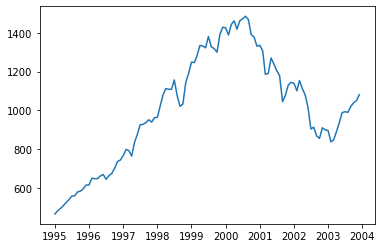

In [8]:
plt.plot(data.SP500)
plt.show()

In [9]:

# ADF Test p< 0.05 for stationary series
from statsmodels.tsa.stattools import adfuller

result = adfuller(data, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.8988863129715972
n_lags: 0.3325852055020977
p-value: 0.3325852055020977
Critial Values:
   1%, -3.4936021509366793
Critial Values:
   5%, -2.8892174239808703
Critial Values:
   10%, -2.58153320754717


In [10]:
#Spliting the dataset into train and test
train = data[:102]
test = data[-6:]

In [11]:
train.tail()

,SP500
Date,
2003-02-01,837.03
2003-03-01,846.63
2003-04-01,890.03
2003-05-01,935.96
2003-06-01,988.00


In [12]:
test.head()

,SP500
Date,
2003-07-01,992.54
2003-08-01,989.53
2003-09-01,1019.44
2003-10-01,1038.73
2003-11-01,1049.90


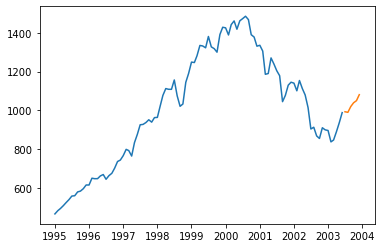

In [13]:
plt.plot(train)
plt.plot(test)

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency informa

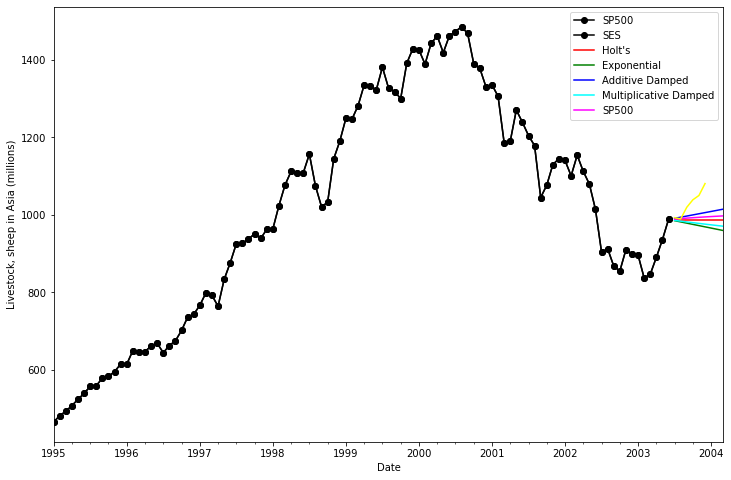

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [15]:
fit1 = SimpleExpSmoothing(train, initialization_method="estimated").fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(train, initialization_method="estimated").fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(train, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(train, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(train, exponential=True, damped_trend=True, initialization_method="estimated").fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = train.plot(color="black", marker="o", figsize=(12,8))
train.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
test.plot(ax=ax, color='yellow', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

In [ ]:
fit1 = ExponentialSmoothing(data, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(data, seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(data, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(data, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse] 
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]  
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse] 
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse] 

ax = data.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(6).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(6).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure: Forecasting SP500 using Holt-Winters method with both additive and multiplicative seasonality.")

results